# Vancouver Transit Exploration Task
## CMPT 353 Final Project
### Jason Cai, Rebekah Wong (Group: "Mute Jammers")

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

## Introduction: looking at transit data as is

In [2]:
# Read transit data from directory
transit = gpd.read_file("data/transit.zip")

# Rename columns for clarity
transit = transit.rename(columns={'csdname':'city', 'policy_yea':'year', 'transit_qu':'transit_quality'})

# Only keep necessary columns for analysis
transit = transit[['city', 'year', 'transit_quality', 'geometry']]

# Need to use "|" instead of Python "or" to prevent ambiguity error - https://stackoverflow.com/q/36921951
transit = transit[(transit['year'] == 2010) | (transit['year'] == 2015) | (transit['year'] == 2020)]

transit

,city,year,transit_quality,geometry
0,Vancouver,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,Vancouver,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,Vancouver,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,Vancouver,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,Vancouver,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...
5947,Vancouver,2020,1795.115966,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
5948,Vancouver,2020,1819.825217,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
5949,Vancouver,2020,1001.975525,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
5950,Vancouver,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


<AxesSubplot:>

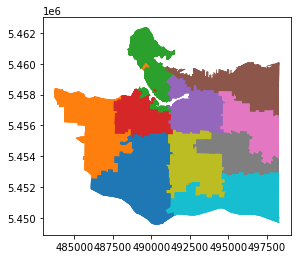

In [3]:
# Plot map of Vancouver based on geometry shapes in data
transit.plot(column='geometry')

<AxesSubplot:>

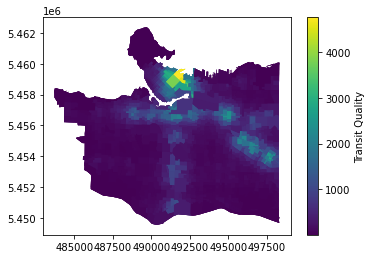

In [4]:
# Transit quality needs cleaning! Graph does not look very informative as is :(
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
transit.plot(column='transit_quality', legend=True, legend_kwds={'label':'Transit Quality'})

In [5]:
# Preliminary work: Print data as is, prior to any cleaning/analysis
# Sort transit quality from highest score to lowest
transit.sort_values(by='transit_quality', ascending=False)

,city,year,transit_quality,geometry
5840,Vancouver,2020,4765.249599,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
2864,Vancouver,2020,4549.568024,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
5872,Vancouver,2020,4509.035780,"POLYGON ((492085.822 5459067.742, 492071.152 5..."
1872,Vancouver,2015,4457.191718,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
880,Vancouver,2010,4420.839584,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
...,...,...,...,...
517,Vancouver,2010,1.160075,"POLYGON ((485911.931 5455587.268, 485910.903 5..."
5493,Vancouver,2020,0.693054,"POLYGON ((486989.341 5453053.085, 487006.918 5..."
2517,Vancouver,2020,0.568181,"POLYGON ((486989.341 5453053.085, 487006.918 5..."
1525,Vancouver,2015,0.551531,"POLYGON ((486989.341 5453053.085, 487006.918 5..."


In [6]:
transit['transit_quality'].min()

0.545307569824622

In [7]:
transit['transit_quality'].max()

4765.24959913149

In [8]:
transit['transit_quality'].mean()

446.5466410165331

(array([2789.,  590.,  312.,  157.,   67.,   33.,    7.,    5.,    3.,
           5.]),
 array([5.45307570e-01, 4.77015737e+02, 9.53486166e+02, 1.42995660e+03,
        1.90642702e+03, 2.38289745e+03, 2.85936788e+03, 3.33583831e+03,
        3.81230874e+03, 4.28877917e+03, 4.76524960e+03]),
 <BarContainer object of 10 artists>)

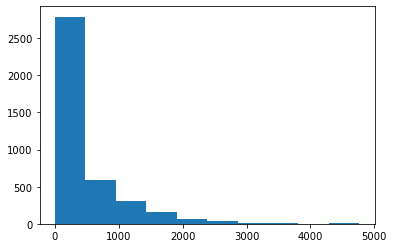

In [9]:
# Notice how the data is heavily right-skewed - fix by sqrt or log
plt.hist(transit['transit_quality'])

## Data Cleaning: Modifying skewed data

In [10]:
# Square root all transit quality values
transit['sqrt'] = transit['transit_quality']**0.5

# Next possible fix: apply log to all transit quality values
transit['log'] = np.log(transit['transit_quality'])

transit

,city,year,transit_quality,geometry,sqrt,log
0,Vancouver,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.496467,1.829753
1,Vancouver,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5...",9.291451,4.458190
2,Vancouver,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5...",11.205590,4.832826
3,Vancouver,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5...",15.705240,5.507989
4,Vancouver,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5...",12.256855,5.012171
...,...,...,...,...,...,...
5947,Vancouver,2020,1795.115966,"POLYGON ((491123.035 5459615.245, 491120.710 5...",42.368809,7.492825
5948,Vancouver,2020,1819.825217,"POLYGON ((491676.840 5459587.193, 491605.386 5...",42.659409,7.506496
5949,Vancouver,2020,1001.975525,"POLYGON ((492570.830 5458268.003, 492570.838 5...",31.653997,6.909729
5950,Vancouver,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5...",52.753338,7.931254


(array([ 580., 1420.,  732.,  458.,  391.,  224.,  109.,   38.,    8.,
           8.]),
 array([ 0.73844944,  7.56768323, 14.39691701, 21.2261508 , 28.05538459,
        34.88461838, 41.71385217, 48.54308596, 55.37231975, 62.20155354,
        69.03078733]),
 <BarContainer object of 10 artists>)

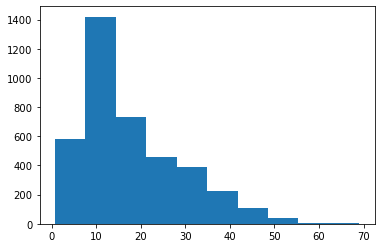

In [11]:
plt.hist(transit['sqrt'])

<AxesSubplot:>

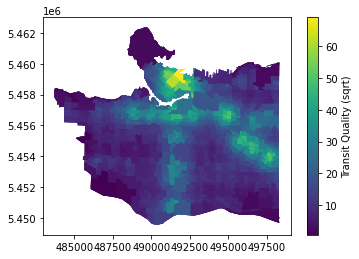

In [12]:
transit.plot(column='sqrt', legend=True, legend_kwds={'label':'Transit Quality (sqrt)'})

In [13]:
transit['sqrt'].min()

0.7384494362003549

In [14]:
transit['sqrt'].max()

69.0307873280574

In [15]:
transit['sqrt'].mean()

17.84035248958655

(array([   7.,   13.,   26.,   86.,  335., 1027.,  900.,  781.,  677.,
         116.]),
 array([-0.6064053 ,  0.30114575,  1.2086968 ,  2.11624785,  3.0237989 ,
         3.93134995,  4.838901  ,  5.74645205,  6.6540031 ,  7.56155415,
         8.4691052 ]),
 <BarContainer object of 10 artists>)

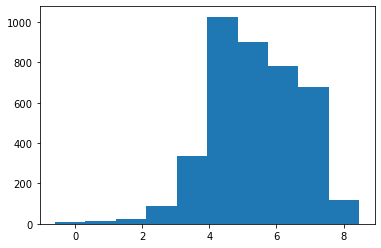

In [16]:
# Next possible fix: apply log to all transit quality values
plt.hist(transit['log'])

<AxesSubplot:>

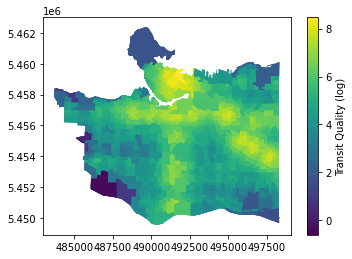

In [17]:
transit.plot(column='log', legend=True, legend_kwds={'label':'Transit Quality (log)'})

In [18]:
transit['log'].min()

-0.6064052952014497

In [19]:
transit['log'].max()

8.469105196485888

In [20]:
transit['log'].mean()

5.357822267444569

## Final Scores: log(transit_quality) + 1

In [21]:
# Based on the min/max results above, we could further add 1 to each value so that the numbers fit neatly into a 0 to 10 range
transit['quality_score'] = transit['log'] + 1

In [22]:
transit['quality_score'].min()

0.3935947047985503

In [23]:
transit['quality_score'].max()

9.469105196485888

In [24]:
transit['quality_score'].mean()

6.357822267444574

<AxesSubplot:>

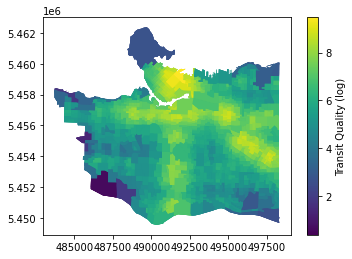

In [25]:
transit.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'})

In [26]:
# Keep relevant columns after scaling skewed data
transit = transit[['city', 'year', 'quality_score', 'geometry']]

## Work in progress

In [27]:
# Determine which regions of Vancouver tend to score higher in transit quality
transit_quality = transit.groupby('geometry').agg({'quality_score' : 'mean'}).sort_values(by='quality_score', ascending=False)
transit_quality

,quality_score
geometry,
"POLYGON ((492095.223 5459290.725, 492082.463 5...",9.422063
"POLYGON ((492085.822 5459067.742, 492071.152 5...",9.360151
"POLYGON ((491791.753 5458968.754, 491827.146 5...",9.194106
"POLYGON ((492412.349 5458751.986, 492410.459 5...",9.070947
"POLYGON ((492736.965 5458024.229, 492735.252 5...",8.968347
...,...
"POLYGON ((485906.677 5454843.926, 485906.039 5...",1.878309
"POLYGON ((488407.626 5452158.836, 488427.552 5...",1.839724
"POLYGON ((485056.776 5458146.633, 485053.650 5...",1.727413


In [28]:
# Process dataframes more to leave only quality and area of Vancouver for comparisons
transit_quality = transit_quality.reset_index()
transit_quality = transit_quality[['quality_score', 'geometry']]
transit_quality

,quality_score,geometry
0,9.422063,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
1,9.360151,"POLYGON ((492085.822 5459067.742, 492071.152 5..."
2,9.194106,"POLYGON ((491791.753 5458968.754, 491827.146 5..."
3,9.070947,"POLYGON ((492412.349 5458751.986, 492410.459 5..."
4,8.968347,"POLYGON ((492736.965 5458024.229, 492735.252 5..."
...,...,...
987,1.878309,"POLYGON ((485906.677 5454843.926, 485906.039 5..."
988,1.839724,"POLYGON ((488407.626 5452158.836, 488427.552 5..."
989,1.727413,"POLYGON ((485056.776 5458146.633, 485053.650 5..."
990,1.215100,"POLYGON ((485911.931 5455587.268, 485910.903 5..."


In [29]:
# 'transit_quality' = original transit quality score for the given year
# 'quality_avg_all_yrs' = average score for region of Vancouver (geometry) across all years
transit_merged = transit.merge(transit_quality, on=['geometry'])

# Rename columns for clarity
transit_merged = transit_merged.rename(columns={'quality_score_x':'transit_quality',
                                                'quality_score_y':'quality_avg_all_yrs'})

transit_merged

,city,year,transit_quality,geometry,quality_avg_all_yrs
0,Vancouver,2010,2.829753,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.856574
1,Vancouver,2015,2.830236,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.856574
2,Vancouver,2020,2.850788,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.856574
3,Vancouver,2020,2.915521,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.856574
4,Vancouver,2010,5.458190,"POLYGON ((498303.642 5459212.268, 498303.155 5...",5.510685
...,...,...,...,...,...
3963,Vancouver,2020,8.931254,"POLYGON ((492175.437 5458706.854, 492275.116 5...",8.882093
3964,Vancouver,2010,8.613343,"POLYGON ((492742.239 5458227.186, 492740.089 5...",8.643686
3965,Vancouver,2015,8.620476,"POLYGON ((492742.239 5458227.186, 492740.089 5...",8.643686
3966,Vancouver,2020,8.645573,"POLYGON ((492742.239 5458227.186, 492740.089 5...",8.643686


In [30]:
# Plot map of Vancouver based on geometry shapes in data
# transit_quality.plot(column='geometry')

In [31]:
# Data range: 2010, 2015, 2020
# Extract relevant years into separate dataframes
transit_2010 = transit[transit['year'] == 2010]
transit_2010

,city,year,quality_score,geometry
0,Vancouver,2010,2.829753,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,Vancouver,2010,5.458190,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,Vancouver,2010,5.832826,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,Vancouver,2010,6.507989,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,Vancouver,2010,6.012171,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...
987,Vancouver,2010,8.413423,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
988,Vancouver,2010,8.432154,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
989,Vancouver,2010,7.836553,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
990,Vancouver,2010,8.853501,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [32]:
transit_2010['quality_score'].mean()

6.196180441857331

In [33]:
transit_2015 = transit[transit['year'] == 2015]
transit_2015

,city,year,quality_score,geometry
992,Vancouver,2015,2.830236,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
993,Vancouver,2015,5.458358,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
994,Vancouver,2015,5.832944,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
995,Vancouver,2015,6.508120,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
996,Vancouver,2015,6.012399,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...
1979,Vancouver,2015,8.420976,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
1980,Vancouver,2015,8.440356,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
1981,Vancouver,2015,7.844865,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
1982,Vancouver,2015,8.861268,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [34]:
transit_2015['quality_score'].mean()

6.370723077134794

In [35]:
transit_2020 = transit[transit['year'] == 2020]
transit_2020

,city,year,quality_score,geometry
1984,Vancouver,2020,2.850788,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1985,Vancouver,2020,5.500227,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
1986,Vancouver,2020,5.879355,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
1987,Vancouver,2020,6.553959,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
1988,Vancouver,2020,6.058400,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...
5947,Vancouver,2020,8.492825,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
5948,Vancouver,2020,8.506496,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
5949,Vancouver,2020,7.909729,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
5950,Vancouver,2020,8.931254,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [36]:
transit_2020['quality_score'].mean()

6.432192775393023